#Import the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
from keras.models import load_model
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Shared Functions

In [2]:
#Visualize data

def EDA(df):
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))

  ax1.plot(df['Open'])
  ax1.set_xlabel("Day", fontsize=15)
  ax1.set_ylabel("Open", fontsize=15)

  ax2.plot(df['High'], color='green')
  ax2.set_xlabel("Day", fontsize=15)
  ax2.set_ylabel("High", fontsize=15)

  ax3.plot(df['Low'], color='red')
  ax3.set_xlabel("Day", fontsize=15)
  ax3.set_ylabel("Low", fontsize=15)

  ax4.plot(df['Close'], color='orange')
  ax4.set_xlabel("Day", fontsize=15)
  ax4.set_ylabel("Close", fontsize=15)

  ax5.plot(df['Volume'], color='purple')
  ax5.set_xlabel("Day", fontsize=15)
  ax5.set_ylabel("Volume", fontsize=15)

  plt.show()

In [3]:
#Preprocessing data
def select_data(df, ticker):
  df['timestamp'] = pd.to_datetime(df['Date/Time'])

  #Split Date/Time
  df['hour'] = df['timestamp'].dt.hour
  df['day_of_week'] = df['timestamp'].dt.day
  df['month'] = df['timestamp'].dt.month
  df['year'] = df['timestamp'].dt.year

  # Create hourly groups
  grouped = df.groupby(pd.Grouper(key='timestamp', freq='H'))

  # Take value of each feature
  hour_after = grouped['hour'].first()
  day = grouped['day_of_week'].first()
  month = grouped['month'].first()
  year = grouped['year'].first()
  open_value_per_hour = grouped['Open'].first()
  close_value_per_hour = grouped['Close'].last()

  hourly_summary = grouped.agg({
      'High': 'max',
      'Low': 'min',
      'Volume': 'sum'
  })

  # Take hour in group
  hour_after_group = list()
  for hour, group in grouped:
      hour_after_group.append(hour)

  sticker = [ticker] * len(hourly_summary['High'])


  dataset1 = {
      "HourAfterGroup": hour_after_group,
      "Ticker": sticker,
      "Year": year,
      "Month": month,
      "Day": day,
      "Hour": hour_after,
      "Open": open_value_per_hour,
      "High": hourly_summary['High'],
      "Low": hourly_summary['Low'],
      "Close": close_value_per_hour,
      "Volume": hourly_summary['Volume']
  }
  newdf = pd.DataFrame(dataset1)
  newdf.dropna(how='any', inplace=True)

  return newdf

In [4]:
#Take features to train

def take_training_data(df, x, y):
  return df.iloc[:, x:y].values

In [5]:
#Create training and labeling data

def create_data_structure(dataset, feature):
  X = []
  y = []
  for i in range(60, len(dataset)):
    X.append(dataset[i-60:i, :])
    y.append(dataset[i, feature])
  X = np.array(X)
  y = np.array(y)
  return X,y

In [6]:
#Build the Model Use LTSM

def build_model(X_train):
  regressor = Sequential()

  regressor.add
  regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50, return_sequences=True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50, return_sequences=True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50))
  regressor.add(Dropout(0.2))

  regressor.add(Dense(units=1))

  regressor.summary()

  return regressor

In [7]:
def train_model(model_filename, regressor):
  path_name = '/content/' + model_filename
  if os.path.isfile(path_name):
      os.remove(path_name)

  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs=100, batch_size=64)
  regressor.save(model_filename)

In [8]:
def evaluate_the_model(y_test, y_pred):
  print("MAE:", mean_absolute_error(y_true=y_test, y_pred=y_pred))
  print("MSE:", mean_squared_error(y_true=y_test, y_pred=y_pred))  # default=True
  print("RMSE:", mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False))

In [9]:
def visualize_the_results(y_test, predicted_stock):
  past_interval = 700
  present_interval = 1400


  part1_y_test = y_test[:past_interval]
  part1_predicted_stock = predicted_stock[:past_interval]

  part2_y_test = y_test[past_interval:present_interval]
  part2_predicted_stock = predicted_stock[past_interval:present_interval]

  part3_y_test = y_test[present_interval:]
  part3_predicted_stock = predicted_stock[present_interval:]

  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

  ax1.plot(part1_y_test, color='red', label='Actual Stock Price')
  ax1.plot(part1_predicted_stock, color='blue', label='Predicted Stock Price')
  ax1.set_xlabel('Time Part1', fontsize=15)
  ax1.set_ylabel('Stock Price', fontsize=15)

  ax2.plot(part2_y_test, color='red', label='Actual Stock Price')
  ax2.plot(part2_predicted_stock, color='blue', label='Predicted Stock Price')
  ax2.set_xlabel('Time Part2', fontsize=15)
  ax2.set_ylabel('Stock Price', fontsize=15)

  ax3.plot(part3_y_test, color='red', label='Actual Stock Price')
  ax3.plot(part3_predicted_stock, color='blue', label='Predicted Stock Price')
  ax3.set_xlabel('Time Part3', fontsize=15)
  ax3.set_ylabel('Stock Price', fontsize=15)

  ax1.legend()
  ax2.legend()
  ax3.legend()

  plt.show()

#Load and Preprocess Data

In [10]:
!git clone https://github.com/qhle2001/Stock-Prediction.git

Cloning into 'Stock-Prediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 3.03 MiB | 10.85 MiB/s, done.


In [11]:
df_MSN = pd.read_csv("/content/Stock-Prediction/MSN.csv")
df_FPT = pd.read_csv("/content/Stock-Prediction/FPT.csv")
df_PNJ = pd.read_csv("/content/Stock-Prediction/PNJ.csv")
df_VIC = pd.read_csv("/content/Stock-Prediction/VIC.csv")

In [12]:
df_MSN.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


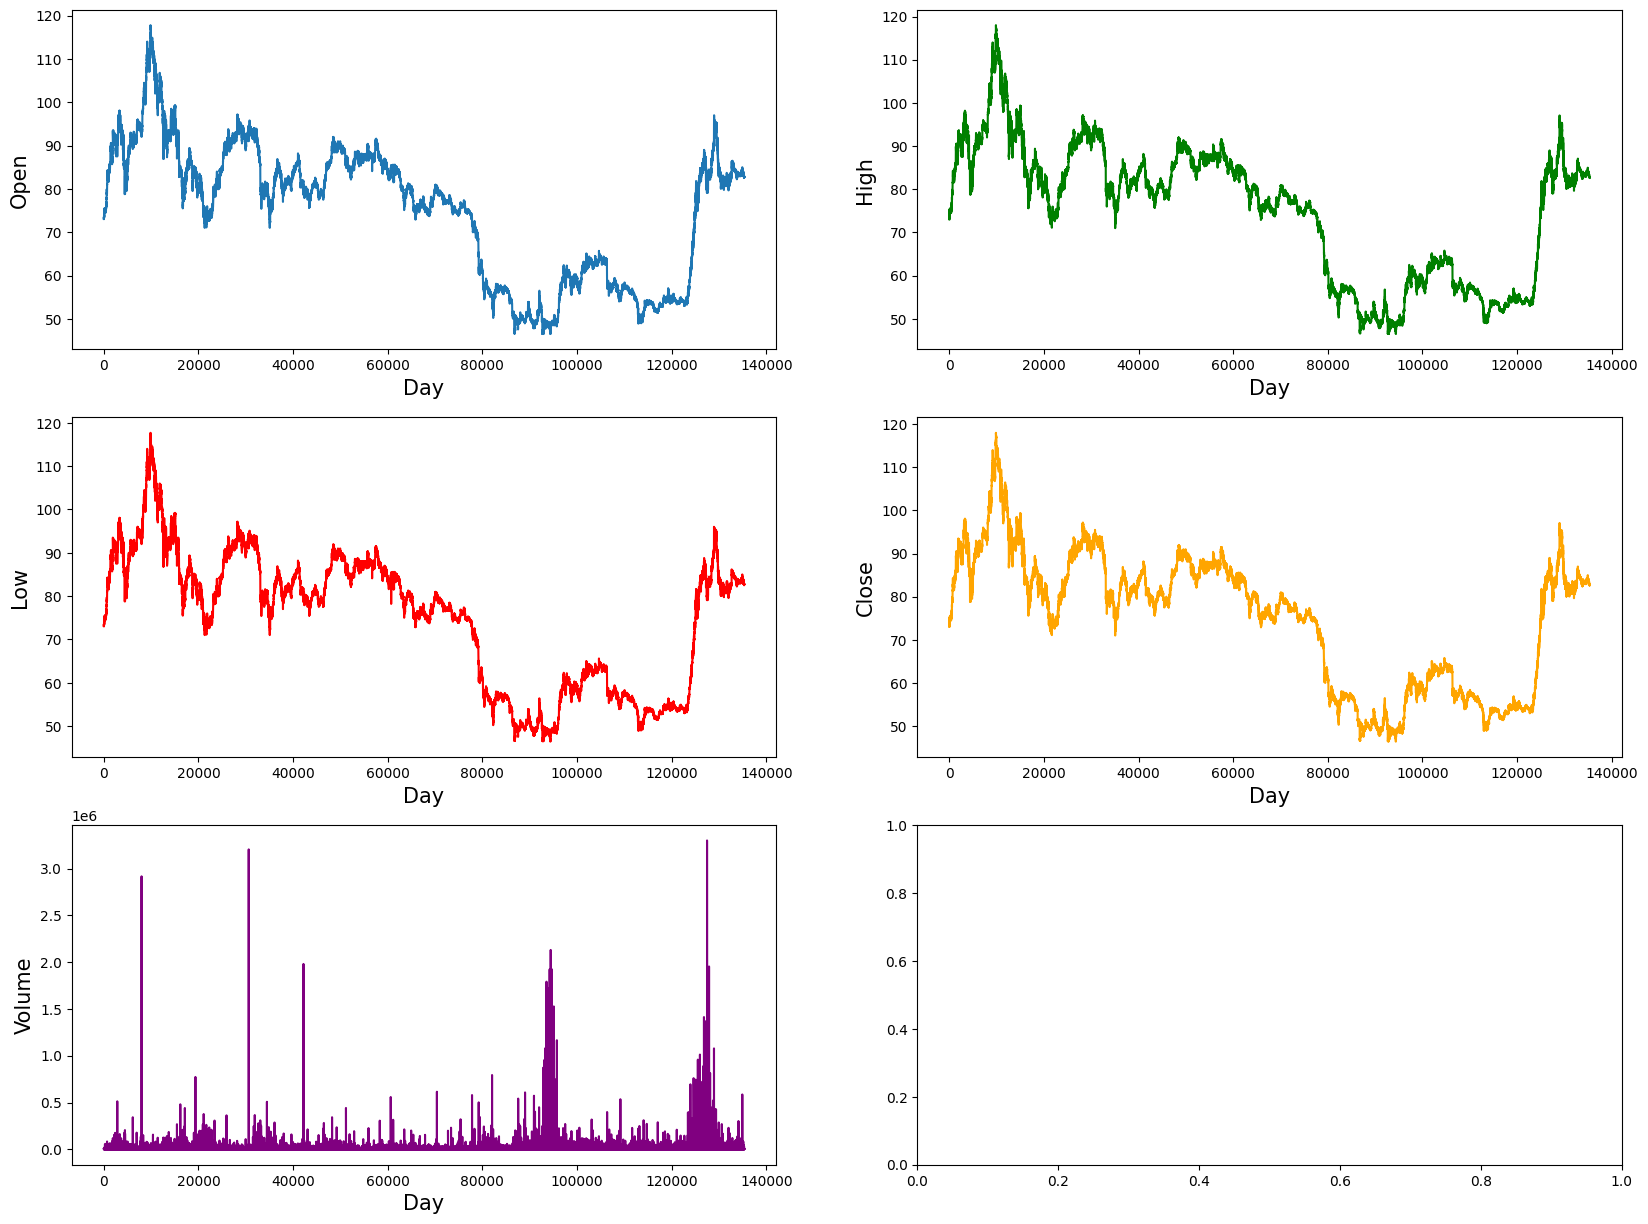

In [13]:
EDA(df_MSN)

In [14]:
#Clean the Data
newdf_MSN = select_data(df_MSN, "MSN")
newdf_FPT = select_data(df_FPT, "FPT")
newdf_PNJ = select_data(df_PNJ, "PNJ")
newdf_VIC = select_data(df_VIC, "VIC")

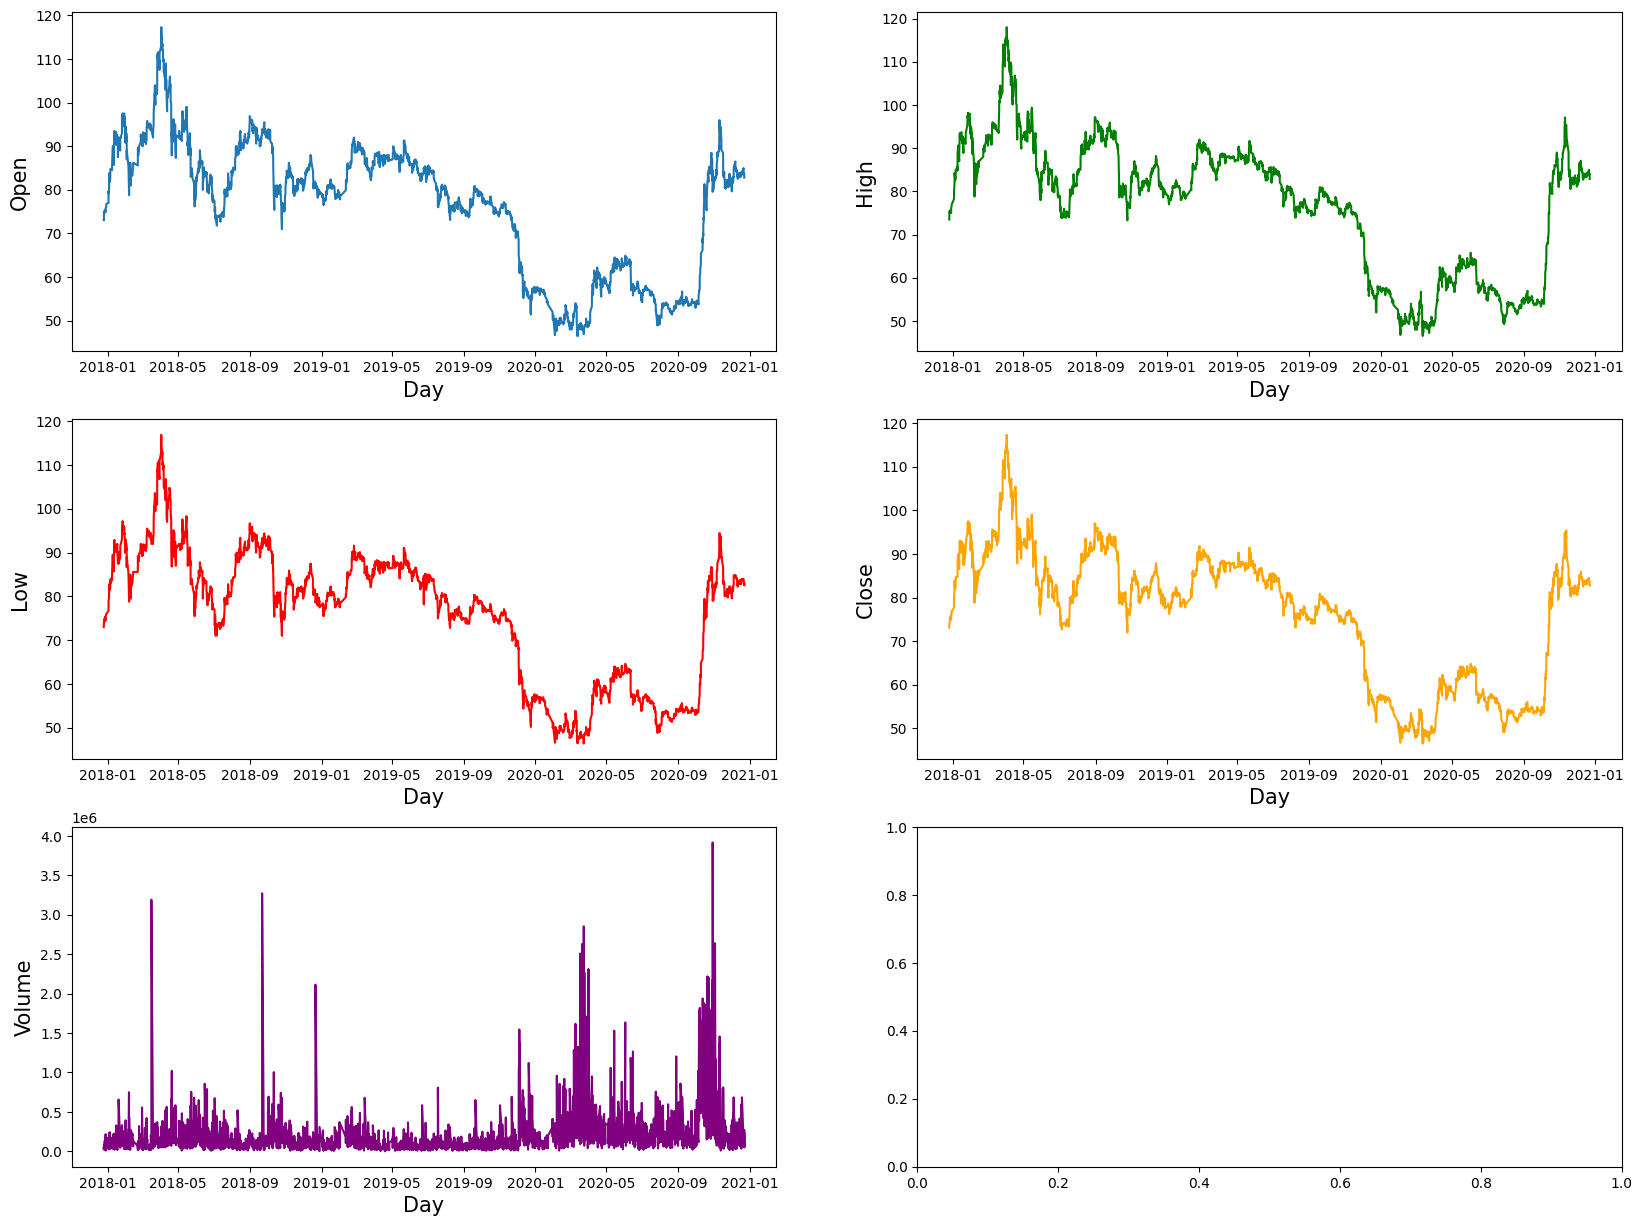

In [15]:
EDA(newdf_MSN)

In [16]:
main_data = pd.concat([newdf_FPT, newdf_MSN, newdf_PNJ, newdf_VIC], axis=0)
main_data.head()

,HourAfterGroup,Ticker,Year,Month,Day,Hour,Open,High,Low,Close,Volume
timestamp,,,,,,,,,,,
2018-12-25 09:00:00,2018-12-25 09:00:00,FPT,2018.0,12.0,25.0,9.0,30.89,30.89,30.59,30.66,84960
2018-12-26 09:00:00,2018-12-26 09:00:00,FPT,2018.0,12.0,26.0,9.0,31.04,31.22,30.89,31.11,49950
2018-12-26 10:00:00,2018-12-26 10:00:00,FPT,2018.0,12.0,26.0,10.0,31.19,31.19,31.04,31.07,95330
2018-12-26 11:00:00,2018-12-26 11:00:00,FPT,2018.0,12.0,26.0,11.0,31.07,31.11,30.96,30.96,37300
2018-12-26 13:00:00,2018-12-26 13:00:00,FPT,2018.0,12.0,26.0,13.0,30.96,31.04,30.89,31.04,61280


In [17]:
sticker_mapping = {"MSN": 1, "FPT": 2, "PNJ": 3, "VIC": 4}

In [18]:
main_data['Ticker'] = main_data['Ticker'].map(sticker_mapping)
main_data.head()

,HourAfterGroup,Ticker,Year,Month,Day,Hour,Open,High,Low,Close,Volume
timestamp,,,,,,,,,,,
2018-12-25 09:00:00,2018-12-25 09:00:00,2,2018.0,12.0,25.0,9.0,30.89,30.89,30.59,30.66,84960
2018-12-26 09:00:00,2018-12-26 09:00:00,2,2018.0,12.0,26.0,9.0,31.04,31.22,30.89,31.11,49950
2018-12-26 10:00:00,2018-12-26 10:00:00,2,2018.0,12.0,26.0,10.0,31.19,31.19,31.04,31.07,95330
2018-12-26 11:00:00,2018-12-26 11:00:00,2,2018.0,12.0,26.0,11.0,31.07,31.11,30.96,30.96,37300
2018-12-26 13:00:00,2018-12-26 13:00:00,2,2018.0,12.0,26.0,13.0,30.96,31.04,30.89,31.04,61280


#Predict Price

In [ ]:
#Take All of the Features Except HourAfterGroup, Volume to Train the Model
data = main_data.iloc[:, 1:10].values

#Scale the Main Data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data

array([[0.33333333, 0.33333333, 1.        , ..., 0.00509886, 0.00387922,
        0.00271682],
       [0.33333333, 0.33333333, 1.        , ..., 0.00853278, 0.00702453,
        0.00741902],
       [0.33333333, 0.33333333, 1.        , ..., 0.0082206 , 0.00859719,
        0.00700104],
       ...,
       [1.        , 1.        , 1.        , ..., 0.79188345, 0.789264  ,
        0.78474399],
       [1.        , 1.        , 1.        , ..., 0.78668054, 0.78716712,
        0.78892372],
       [1.        , 1.        , 1.        , ..., 0.78668054, 0.79136087,
        0.78683386]])

##Use the Open Stock Price to Train the Model




In [ ]:
#Take Open Stock Price
# open_set = take_training_data(newdf_MSN, 5, 6)

#Create Data Structure
X, y = create_data_structure(data, 5)

#Reshape X (Convert 3D array to 2D array)
X = X.reshape(X.shape[0], -1)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Reshape Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Build the model
Open_MSN = build_model(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 540, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 540, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 540, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 540, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
#Train the model
model_filename = 'MSN_Open.h5'

train_model(model_filename, Open_MSN)

Epoch 1/100
156/156 [==============================] - 23s 64ms/step - loss: 0.0260
Epoch 2/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0175
Epoch 3/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0166
Epoch 4/100
156/156 [==============================] - 10s 67ms/step - loss: 0.0160
Epoch 5/100
156/156 [==============================] - 9s 61ms/step - loss: 0.0157
Epoch 6/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0147
Epoch 7/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0068
Epoch 8/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0027
Epoch 9/100
156/156 [==============================] - 12s 80ms/step - loss: 0.0023
Epoch 10/100
156/156 [==============================] - 15s 96ms/step - loss: 0.0021
Epoch 11/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0020
Epoch 12/100
156/156 [==============================] - 11s 71ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Evaluate the model
model = load_model('/content/MSN_Open.h5')
predicted_stock = model.predict(X_test)

evaluate_the_model(y_test, predicted_stock)

78/78 [==============================] - 3s 27ms/step
MAE: 0.008084905938143793
MSE: 0.00010981908615515918
RMSE: 0.010479460203424563


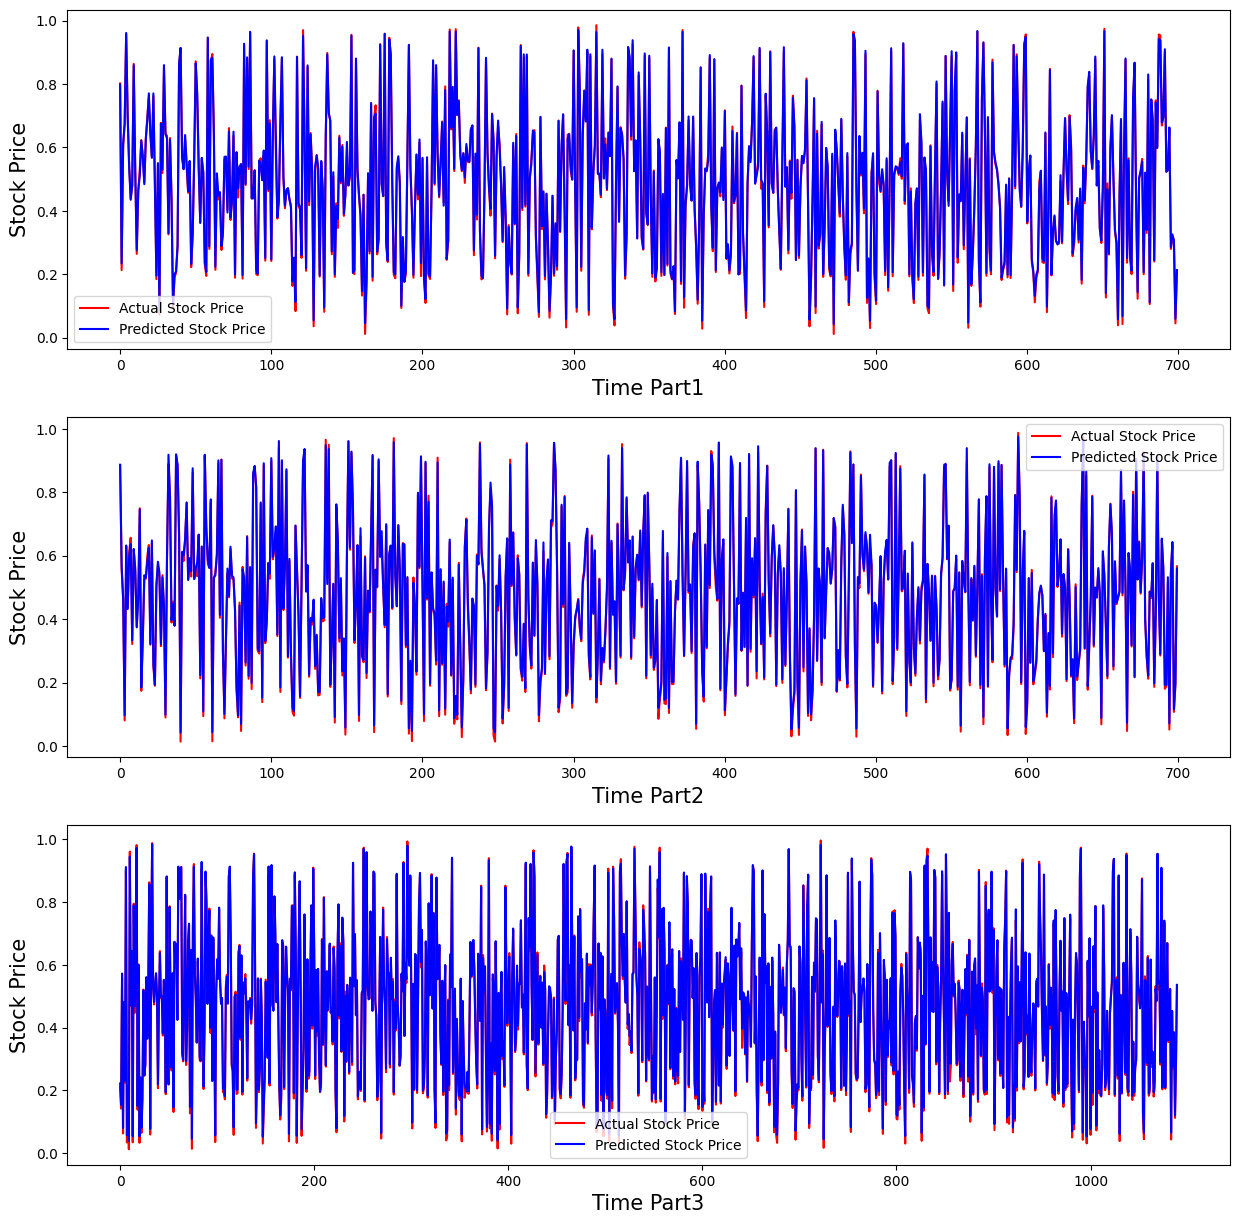

In [ ]:
#Visualize the results
visualize_the_results(y_test, predicted_stock)

389/389 [==============================] - 10s 25ms/step


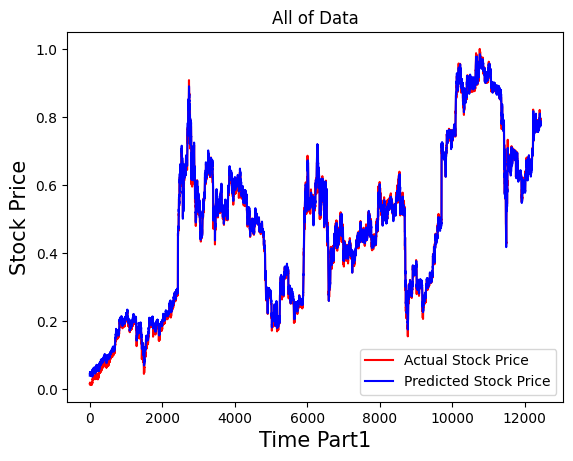

In [ ]:
# plt.figure(figsize=(15,10))
plt.title('All of Data')
plt.plot(y, color='red', label='Actual Stock Price')
plt.plot(model.predict(X), color='blue', label='Predicted Stock Price')
plt.xlabel('Time Part1', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

##Use the Close Stock Price to Train the Model

In [ ]:
#Create Data Structure
X, y = create_data_structure(data, 8)

#Reshape X (Convert 3D array to 2D array)
X = X.reshape(X.shape[0], -1)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Reshape Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Build the model
Close = build_model(X_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 540, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 540, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 540, 50)           20200     
                                                                 
 dropout_6 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
#Train the model
model_filename = 'Close.h5'

train_model(model_filename, Close)

Epoch 1/100
156/156 [==============================] - 20s 66ms/step - loss: 0.0284
Epoch 2/100
156/156 [==============================] - 11s 72ms/step - loss: 0.0169
Epoch 3/100
156/156 [==============================] - 12s 75ms/step - loss: 0.0166
Epoch 4/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0161
Epoch 5/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0163
Epoch 6/100
156/156 [==============================] - 10s 64ms/step - loss: 0.0154
Epoch 7/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0154
Epoch 8/100
156/156 [==============================] - 10s 65ms/step - loss: 0.0138
Epoch 9/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0047
Epoch 10/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0026
Epoch 11/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0023
Epoch 12/100
156/156 [==============================] - 10s 62ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Evaluate the model
model = load_model('/content/Close.h5')
predicted_stock = model.predict(X_test)

evaluate_the_model(y_test, predicted_stock)

78/78 [==============================] - 4s 29ms/step
MAE: 0.011088858241841961
MSE: 0.00018762423943123081
RMSE: 0.01369759976898255


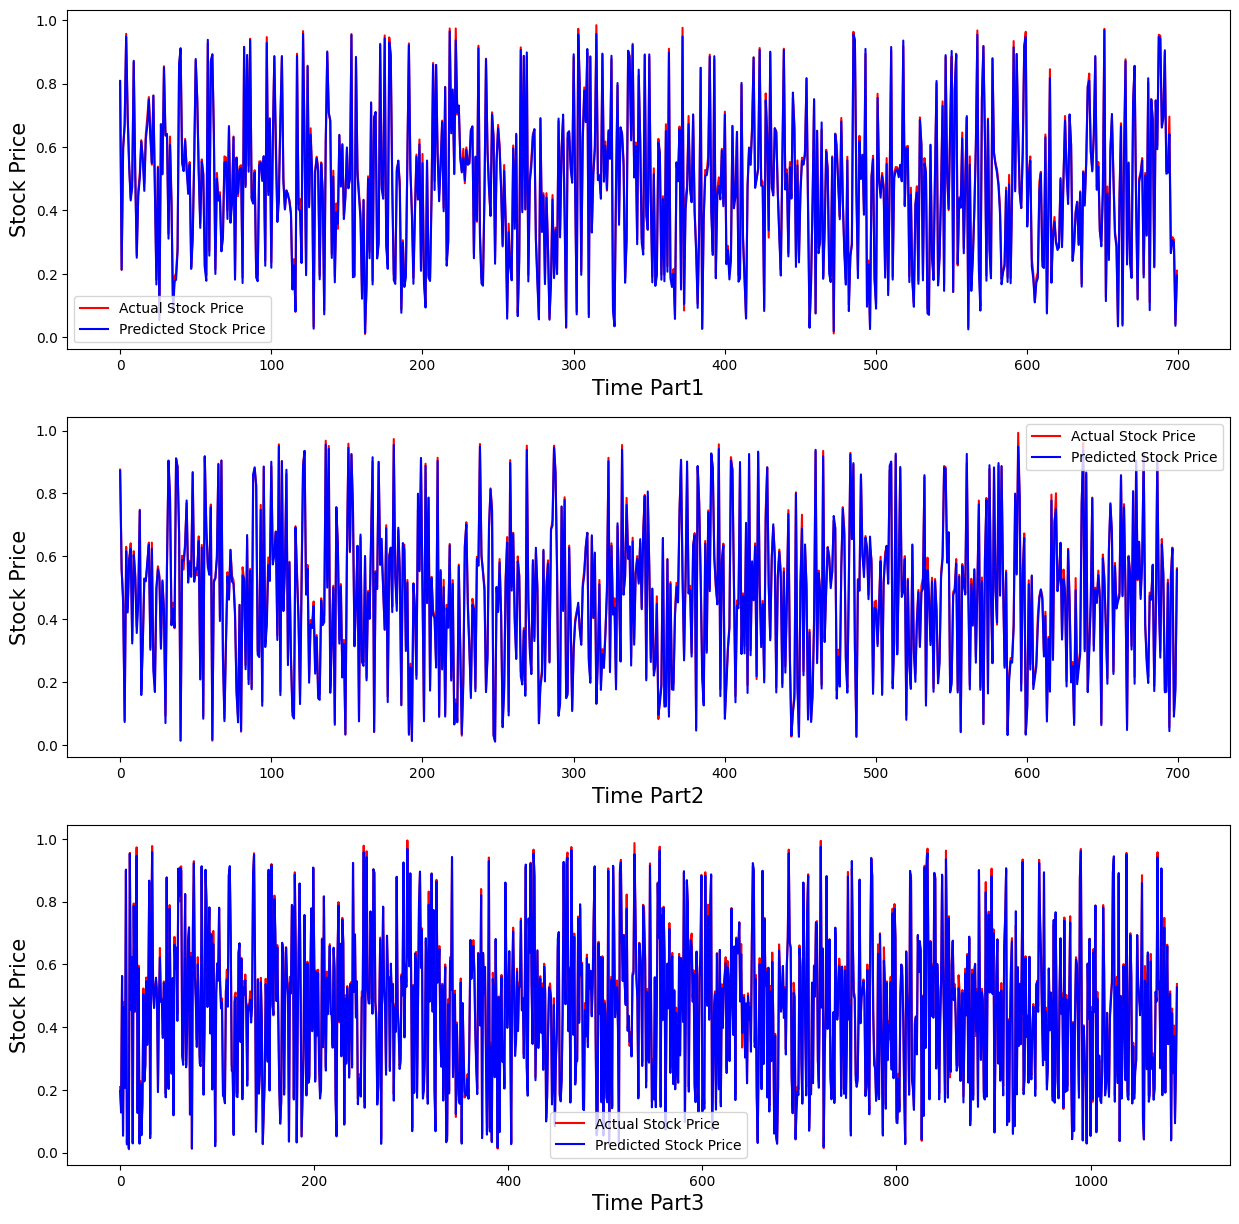

In [ ]:
#Visualize the results
visualize_the_results(y_test, predicted_stock)

389/389 [==============================] - 10s 25ms/step


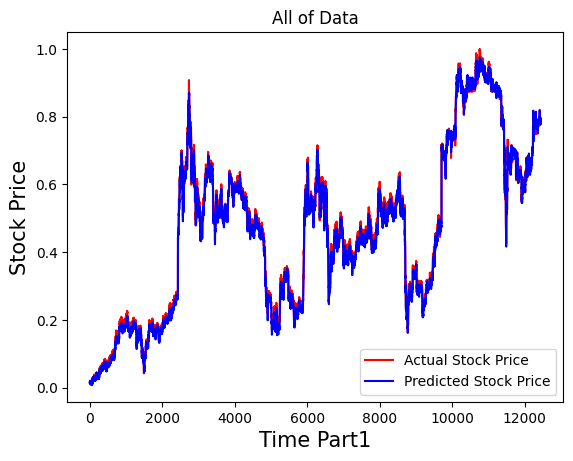

In [ ]:
# plt.figure(figsize=(15,10))
plt.title('All of Data')
plt.plot(y, color='red', label='Actual Stock Price')
plt.plot(model.predict(X), color='blue', label='Predicted Stock Price')
plt.xlabel('Time Part1', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

##Use the High Stock Price to Train the Model

In [ ]:
#Create Data Structure
X, y = create_data_structure(data, 6)

#Reshape X (Convert 3D array to 2D array)
X = X.reshape(X.shape[0], -1)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Reshape Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Build the model
High = build_model(X_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 540, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 540, 50)           20200     
                                                                 
 dropout_9 (Dropout)         (None, 540, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 540, 50)           20200     
                                                                 
 dropout_10 (Dropout)        (None, 540, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [ ]:
#Train the model
model_filename = 'High.h5'

train_model(model_filename, High)

Epoch 1/100
156/156 [==============================] - 16s 65ms/step - loss: 0.0254
Epoch 2/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0170
Epoch 3/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0165
Epoch 4/100
156/156 [==============================] - 10s 61ms/step - loss: 0.0159
Epoch 5/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0155
Epoch 6/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0051
Epoch 7/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0029
Epoch 8/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0024
Epoch 9/100
156/156 [==============================] - 9s 61ms/step - loss: 0.0021
Epoch 10/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0020
Epoch 11/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0018
Epoch 12/100
156/156 [==============================] - 10s 63ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Evaluate the model
model = load_model('/content/High.h5')
predicted_stock = model.predict(X_test)

evaluate_the_model(y_test, predicted_stock)

78/78 [==============================] - 4s 25ms/step
MAE: 0.006742933193988292
MSE: 8.653723478966712e-05
RMSE: 0.009302539158190473


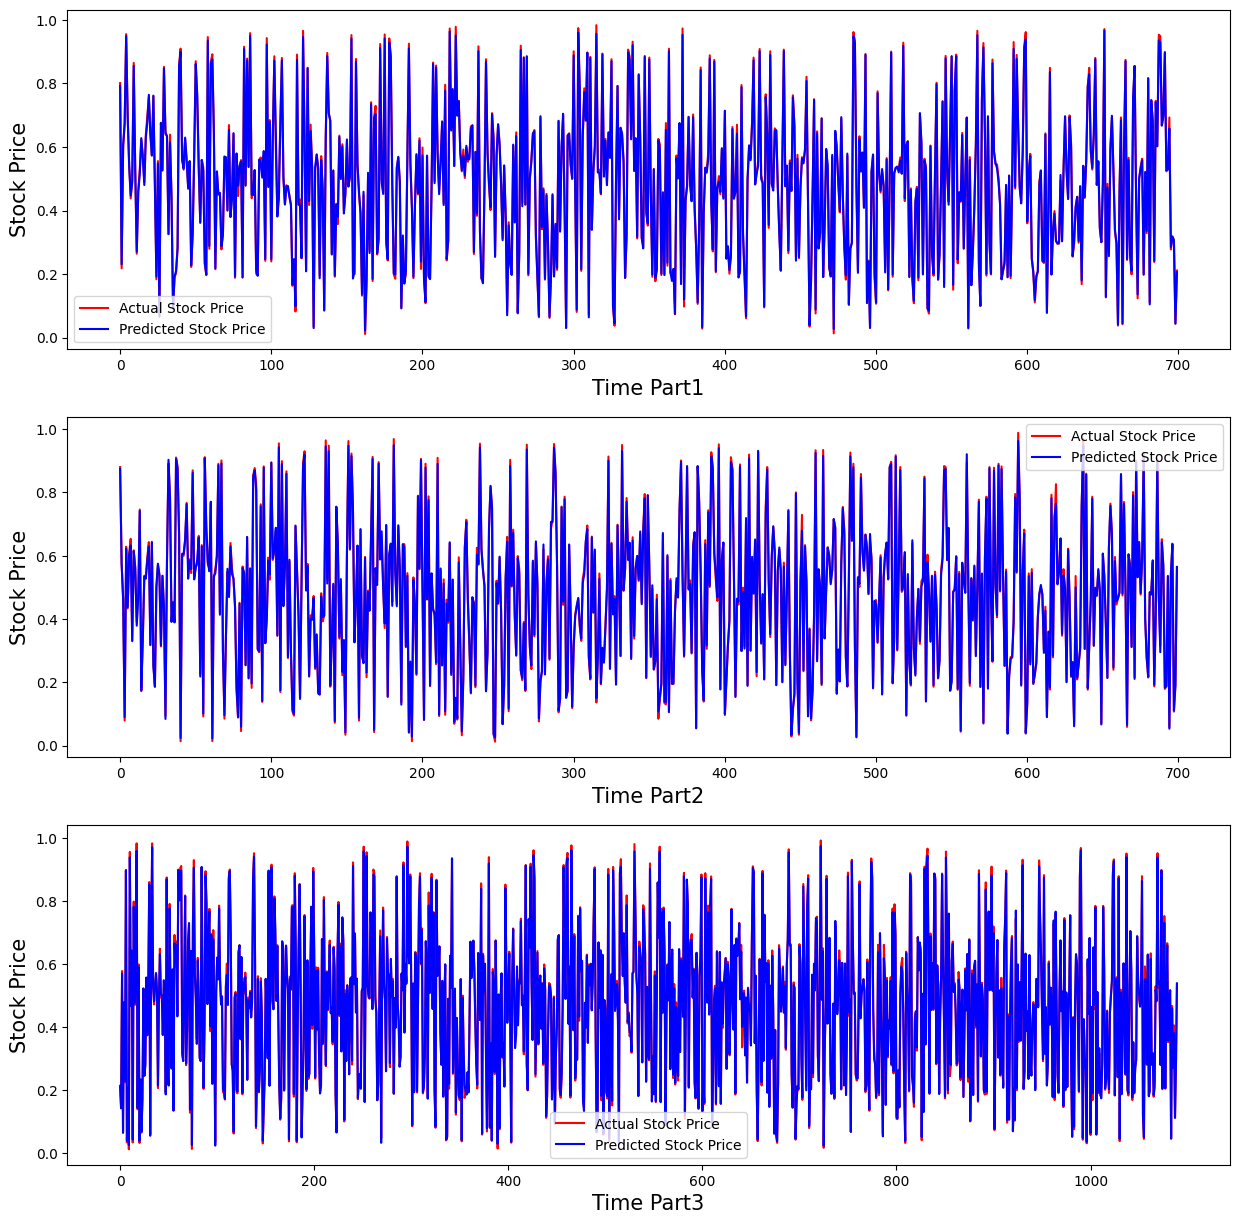

In [ ]:
#Visualize the results
visualize_the_results(y_test, predicted_stock)

389/389 [==============================] - 10s 25ms/step


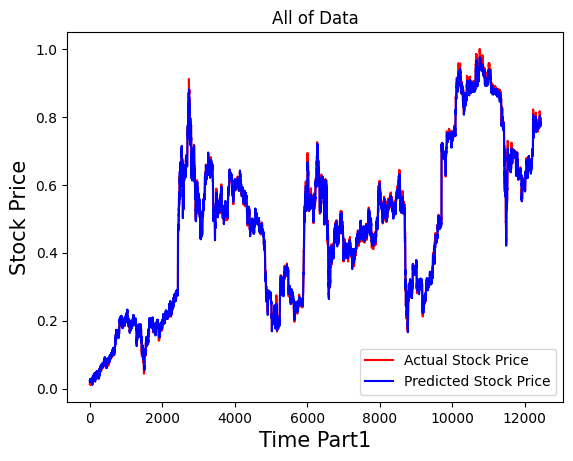

In [ ]:
# plt.figure(figsize=(15,10))
plt.title('All of Data')
plt.plot(y, color='red', label='Actual Stock Price')
plt.plot(model.predict(X), color='blue', label='Predicted Stock Price')
plt.xlabel('Time Part1', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

##Use the Low Stock Price to Train the Model

In [ ]:
#Create Data Structure
X, y = create_data_structure(data, 7)

#Reshape X (Convert 3D array to 2D array)
X = X.reshape(X.shape[0], -1)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Reshape Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Build the model
Low = build_model(X_train)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 540, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 540, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 540, 50)           20200     
                                                                 
 dropout_13 (Dropout)        (None, 540, 50)           0         
                                                                 
 lstm_14 (LSTM)              (None, 540, 50)           20200     
                                                                 
 dropout_14 (Dropout)        (None, 540, 50)           0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [ ]:
#Train the model
model_filename = 'Low.h5'

train_model(model_filename, Low)

Epoch 1/100
156/156 [==============================] - 17s 64ms/step - loss: 0.0260
Epoch 2/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0171
Epoch 3/100
156/156 [==============================] - 9s 60ms/step - loss: 0.0164
Epoch 4/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0161
Epoch 5/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0154
Epoch 6/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0153
Epoch 7/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0069
Epoch 8/100
156/156 [==============================] - 9s 61ms/step - loss: 0.0027
Epoch 9/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0023
Epoch 10/100
156/156 [==============================] - 10s 62ms/step - loss: 0.0021
Epoch 11/100
156/156 [==============================] - 10s 63ms/step - loss: 0.0019
Epoch 12/100
156/156 [==============================] - 10s 61ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Evaluate the model
model = load_model('/content/Low.h5')
predicted_stock = model.predict(X_test)

evaluate_the_model(y_test, predicted_stock)

78/78 [==============================] - 4s 32ms/step
MAE: 0.00823315225123482
MSE: 0.0001153261821187668
RMSE: 0.010739002845644786


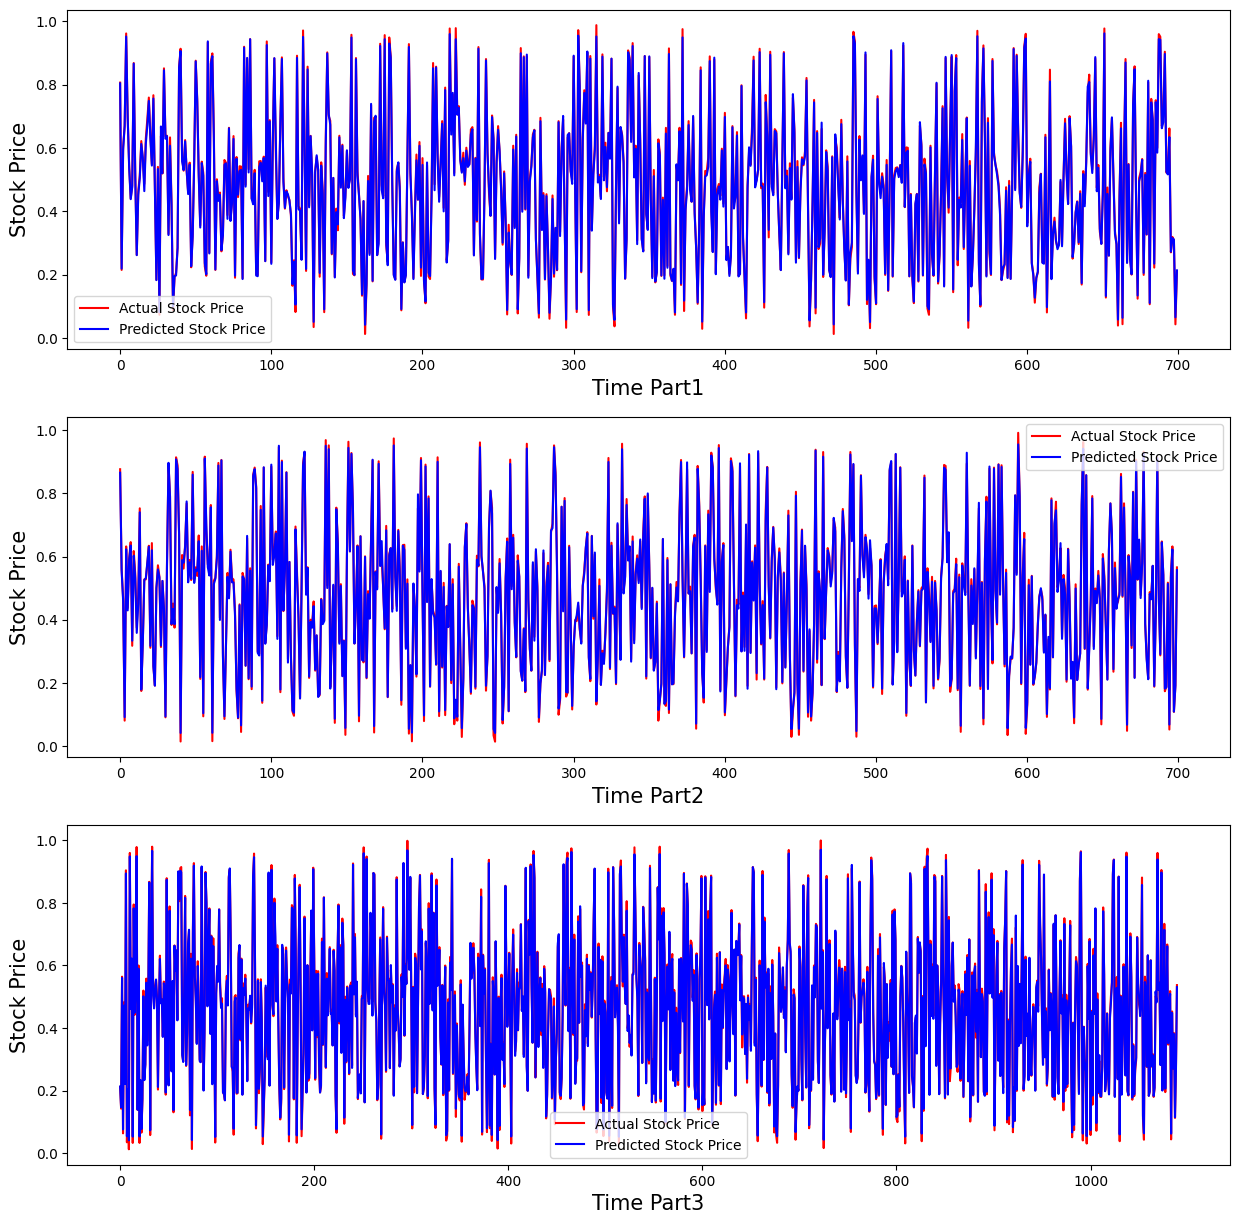

In [ ]:
#Visualize the results
visualize_the_results(y_test, predicted_stock)

389/389 [==============================] - 9s 23ms/step


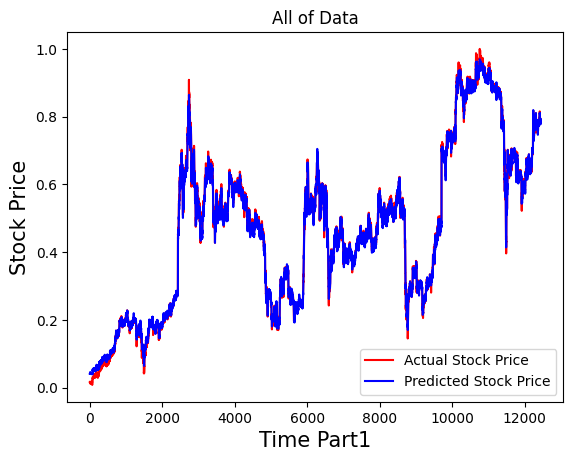

In [ ]:
# plt.figure(figsize=(15,10))
plt.title('All of Data')
plt.plot(y, color='red', label='Actual Stock Price')
plt.plot(model.predict(X), color='blue', label='Predicted Stock Price')
plt.xlabel('Time Part1', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

#Predict Volume

In [19]:
#Take Dataset
dataset = main_data.iloc[:, 1:11].values

#Scale the Main Data
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

#Split to X and y set
X = dataset[:, 1:10]
y = dataset[:, -1]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Reshape the Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [20]:
#Build the Model
Volume = build_model(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 9, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 9, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 9, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 9, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 9, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [21]:
#Train the model
model_filename = 'Volume.h5'

train_model(model_filename, Volume)

Epoch 1/100
157/157 [==============================] - 15s 9ms/step - loss: 0.0034
Epoch 2/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0032
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0031
Epoch 4/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 5/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 7/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 8/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 9/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 10/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0030
Epoch 11/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0030
Epoch 12/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 13

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
#Evaluate the model
model = load_model('/content/Volume.h5')
predicted_stock = model.predict(X_test)

evaluate_the_model(y_test, predicted_stock)

79/79 [==============================] - 2s 4ms/step
MAE: 0.003312912693965731
MSE: 1.902013887921283e-05
RMSE: 0.004361208419602625


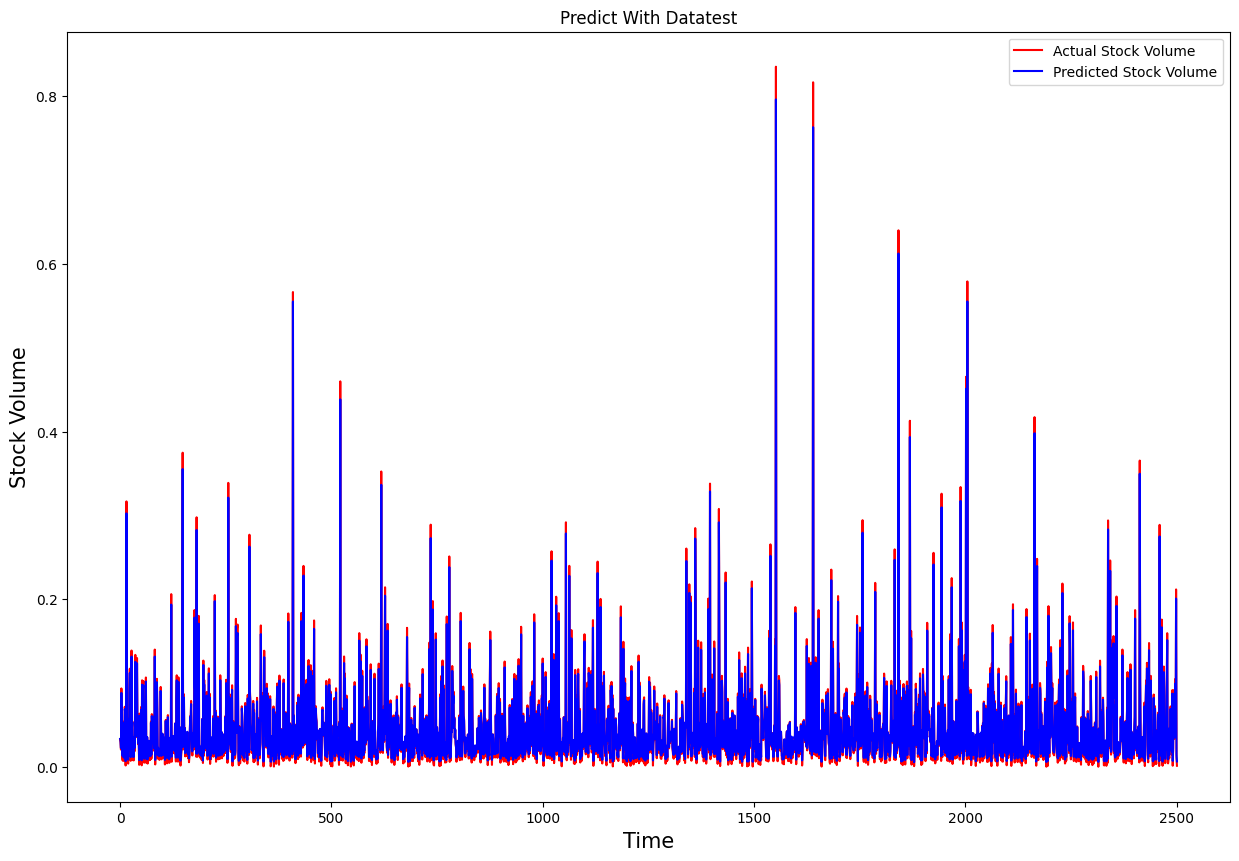

In [25]:
#Visualize the results
plt.figure(figsize=(15,10))
plt.title('Predict With Datatest')
plt.plot(y_test, color='red', label='Actual Stock Volume')
plt.plot(predicted_stock, color='blue', label='Predicted Stock Volume')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Volume', fontsize=15)
plt.legend()
plt.show()

391/391 [==============================] - 1s 4ms/step


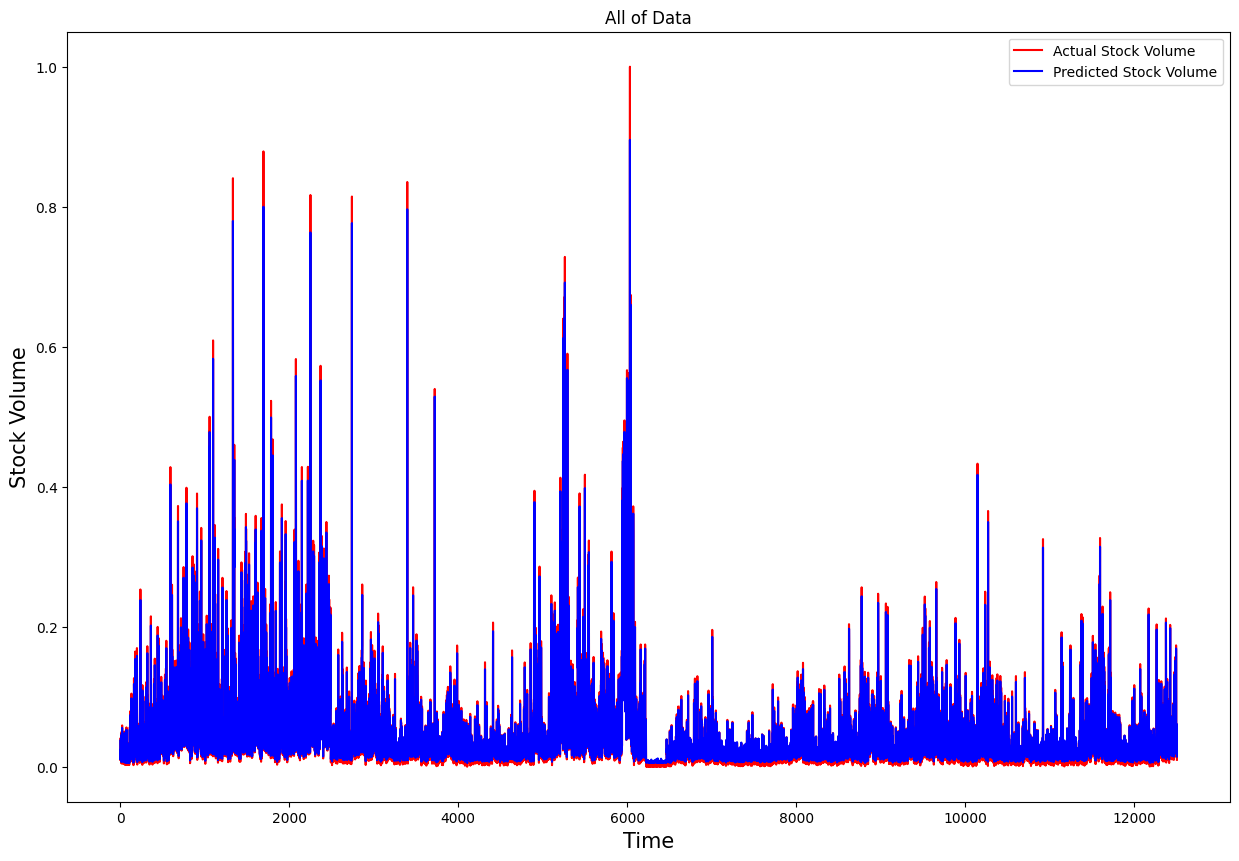

In [26]:
plt.figure(figsize=(15,10))
plt.title('All of Data')
plt.plot(y, color='red', label='Actual Stock Volume')
plt.plot(model.predict(X), color='blue', label='Predicted Stock Volume')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Volume', fontsize=15)
plt.legend()
plt.show()